# Hypothesis Testing & Statistical Analysis

In this notebook, we verify our findings with statistical tests.

**Hypotheses:**
1. **H1:** Higher GDP is associated with more medals.
2. **H2:** Larger Active Population is associated with more medals.
3. **H3 (ANOVA):** There is a significant difference in success between **High Income**, **Medium Income**, and **Low Income** countries.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 1. Load Data (Correct path)
df = pd.read_csv('../data/processed/processed_sports_gdp_population.csv')

# --- CRITICAL FIX: Standardize Column Names ---
# Fix 'Total' -> 'Total_Medals'
if 'Total' in df.columns:
    df.rename(columns={'Total': 'Total_Medals'}, inplace=True)

# Fix Country Name (The cause of your error!)
if 'Country_x' in df.columns:
    df.rename(columns={'Country_x': 'Country'}, inplace=True)
elif 'Country_Mapped' in df.columns:
    df.rename(columns={'Country_Mapped': 'Country'}, inplace=True)

# Drop redundant columns if they exist
if 'Country_y' in df.columns:
    df.drop(columns=['Country_y'], inplace=True)

print("✅ Data Loaded and Columns Fixed.")
print(f"Columns: {df.columns.tolist()}")
display(df.head())

✅ Data Loaded and Columns Fixed.
Columns: ['Year', 'Rank', 'NOC', 'Gold', 'Silver', 'Bronze', 'Total_Medals', 'Country', 'Country_Mapped', 'GDP_Per_Capita', 'Total_Population', 'Active_Population_Total']


,Year,Rank,NOC,Gold,Silver,Bronze,Total_Medals,Country,Country_Mapped,GDP_Per_Capita,Total_Population,Active_Population_Total
0,1992,22,Norway,2,4,1,7,Norway,Norway,34875.0,4359184.0,2815261.0
1,1992,28,New Zealand,1,4,5,10,New Zealand,New Zealand,17189.0,3673400.0,2403555.0
2,1992,25,Brazil,2,1,0,3,Brazil,Brazil,4781.0,161735073.0,101167654.0
3,1992,27,Sweden,1,7,4,12,Sweden,Sweden,30520.0,8826939.0,5621611.0
4,1992,19,Poland,3,6,10,19,Poland,Poland,3705.0,38594998.0,25490654.0


## 1. Testing Hypothesis 1 (H1): Economic Power
We use the **Pearson Correlation Coefficient** and **Linear Regression** to test if wealthier countries win more medals.
- **Null Hypothesis (H0):** There is NO relationship between GDP and Medals.
- **Significance Level (alpha):** 0.05 (We need a p-value < 0.05 to reject H0).

In [5]:
# 1. Pearson Correlation Test
r_value, p_value = stats.pearsonr(df['GDP_Per_Capita'], df['Total_Medals'])

print(f"--- H1 Statistical Results ---")
print(f"Correlation Coefficient (r): {r_value:.4f}")
print(f"P-value: {p_value:.4e}")  # Scientific notation for very small numbers

# Interpretation
if p_value < 0.05:
    print("✅ Result: Statistically Significant. We reject the Null Hypothesis.")
    print("Conclusion: Wealth is positively associated with Olympic success.")
else:
    print("❌ Result: Not Significant. Any observed relationship might be random.")

--- H1 Statistical Results ---
Correlation Coefficient (r): 0.1742
P-value: 1.5595e-05
✅ Result: Statistically Significant. We reject the Null Hypothesis.
Conclusion: Wealth is positively associated with Olympic success.


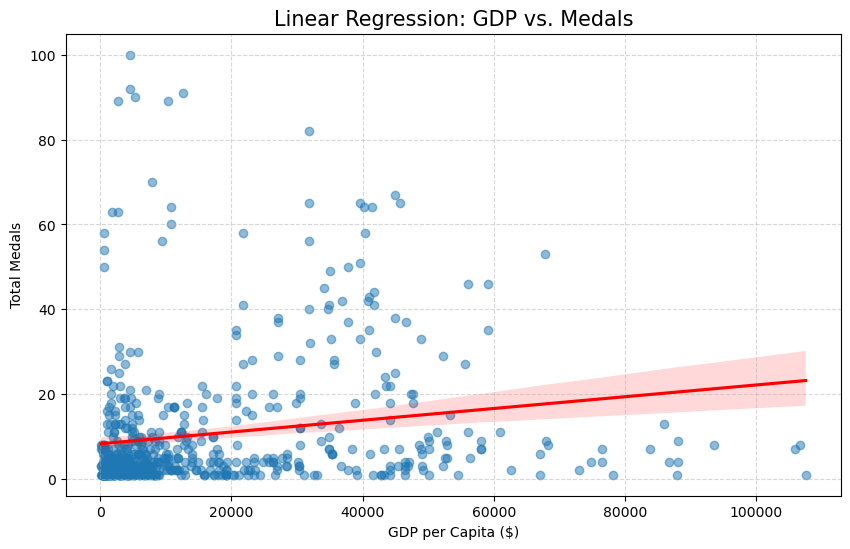

In [6]:
plt.figure(figsize=(10, 6))
sns.regplot(
    data=df, 
    x='GDP_Per_Capita', 
    y='Total_Medals', 
    scatter_kws={'alpha':0.5}, 
    line_kws={'color':'red'}
)
plt.title('Linear Regression: GDP vs. Medals', fontsize=15)
plt.xlabel('GDP per Capita ($)')
plt.ylabel('Total Medals')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

## 2. Testing Hypothesis 2 (H2): Population Power
Now we test if having a larger pool of potential athletes (Active Population ages 15-64) predicts success better than money.

In [7]:
# 1. Pearson Correlation Test (Log transformation is often better for population, but we stick to raw for simplicity)
r_value_pop, p_value_pop = stats.pearsonr(df['Active_Population_Total'], df['Total_Medals'])

print(f"--- H2 Statistical Results ---")
print(f"Correlation Coefficient (r): {r_value_pop:.4f}")
print(f"P-value: {p_value_pop:.4e}")

if p_value_pop < 0.05:
    print("✅ Result: Statistically Significant. Population size matters!")
else:
    print("❌ Result: Not Significant.")

--- H2 Statistical Results ---
Correlation Coefficient (r): 0.4139
P-value: 1.4504e-26
✅ Result: Statistically Significant. Population size matters!


## 3. Comparing Economic Groups (ANOVA Test)
Instead of regression, we group countries into 3 categories: **Low, Medium, and High Income**.
We test if "High Income" countries have a significantly higher average medal count.

Income Groups Created:


,Country,GDP_Per_Capita,Income_Group
0,Norway,34875.0,High Income
1,New Zealand,17189.0,Medium Income
2,Brazil,4781.0,Medium Income
3,Sweden,30520.0,High Income
4,Poland,3705.0,Low Income


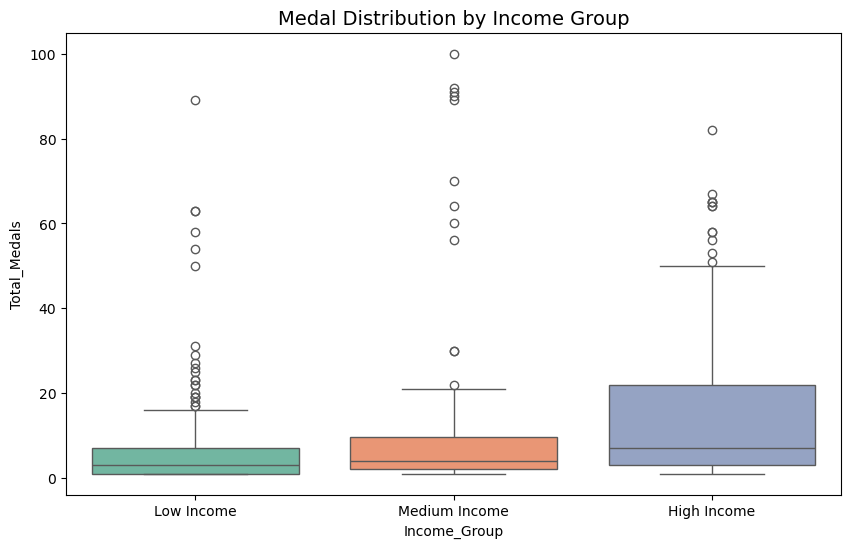

In [13]:
# 1. Create Income Groups
df['Income_Group'] = pd.qcut(df['GDP_Per_Capita'], q=3, labels=['Low Income', 'Medium Income', 'High Income'])

print("Income Groups Created:")
display(df[['Country', 'GDP_Per_Capita', 'Income_Group']].head())

# 2. Visualize with Boxplot (Fixed)
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df, 
    x='Income_Group', 
    y='Total_Medals', 
    hue='Income_Group', # EKLENDİ: Renklendirme kriteri
    palette='Set2', 
    legend=False        # EKLENDİ: Gereksiz etiketi kapat
)
plt.title('Medal Distribution by Income Group', fontsize=14)
plt.show()

In [12]:
from scipy import stats

# Separate data into groups
low = df[df['Income_Group'] == 'Low Income']['Total_Medals']
med = df[df['Income_Group'] == 'Medium Income']['Total_Medals']
high = df[df['Income_Group'] == 'High Income']['Total_Medals']

# Run ANOVA Test
f_stat, p_val = stats.f_oneway(low, med, high)

print(f"ANOVA Results:")
print(f"F-Statistic: {f_stat:.2f}")
print(f"P-Value: {p_val:.4e}")

if p_val < 0.05:
    print("✅ Significant Difference! Wealthy groups definitely win more.")
else:
    print("❌ No Significant Difference.")

ANOVA Results:
F-Statistic: 15.83
P-Value: 1.9815e-07
✅ Significant Difference! Wealthy groups definitely win more.
